<a href="https://colab.research.google.com/github/abhaysrivastav/Pytorch/blob/master/Deep_Neural_Network_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np  
import matplotlib.pyplot as plt   
from sklearn import datasets
import torch
import torch.nn as nn

In [0]:
n_pts = 500
centers = [[-0.5, 0.5], [0.5, -0.5]] 
X , y = datasets.make_circles(n_samples=n_pts, random_state= 123,   noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))

In [0]:
def scatter_plot():
  plt.scatter(X[y == 0, 0], X[y == 0, 1])
  plt.scatter(X[y == 1, 0], X[y == 1, 1])

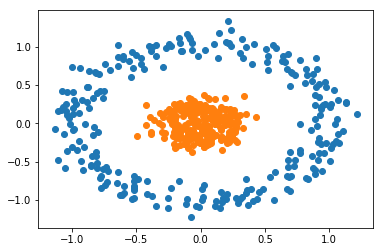

In [4]:
scatter_plot()

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)
  def forward(self, X):
    X = torch.sigmoid(self.linear(X))
    X = torch.sigmoid(self.linear2(X))
    return X
  def predict(self, X):
    pred = self.forward(X)
    if pred >= 0.5:
      return 1
    else:
      return 0 

In [6]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))


[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [8]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epochs : ", i , " loss", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epochs :  0  loss 0.7148522138595581
epochs :  1  loss 0.6947312355041504
epochs :  2  loss 0.6955161094665527
epochs :  3  loss 0.7014897465705872
epochs :  4  loss 0.7013992667198181
epochs :  5  loss 0.697472095489502
epochs :  6  loss 0.6939275860786438
epochs :  7  loss 0.6928625106811523
epochs :  8  loss 0.693941593170166
epochs :  9  loss 0.6954426765441895
epochs :  10  loss 0.6958808302879333
epochs :  11  loss 0.6949241757392883
epochs :  12  loss 0.693157970905304
epochs :  13  loss 0.6914014220237732
epochs :  14  loss 0.6901755332946777
epochs :  15  loss 0.6894775629043579
epochs :  16  loss 0.6888664364814758
epochs :  17  loss 0.6877952814102173
epochs :  18  loss 0.6859349012374878
epochs :  19  loss 0.6832882165908813
epochs :  20  loss 0.6800878047943115
epochs :  21  loss 0.6766111850738525
epochs :  22  loss 0.6730255484580994
epochs :  23  loss 0.6693330407142639
epochs :  24  loss 0.6653968095779419
epochs :  25  loss 0.661038875579834
epochs :  26  loss 0.65613

Text(0.5, 0, 'epochs')

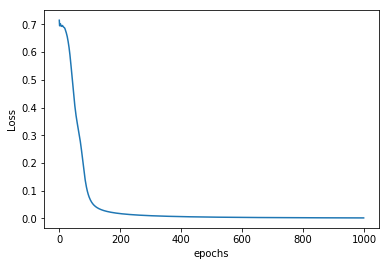

In [9]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epochs')

In [0]:
def plot_decision_boundry(X, y):
  x_span = np.linspace(min(X[: , 0] -1.0) , max(X[:, 0] + 1.0))
  y_span = np.linspace(min(X[: , 1] -1.0) , max(X[:, 1] + 1.0))
  xx , yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)
  

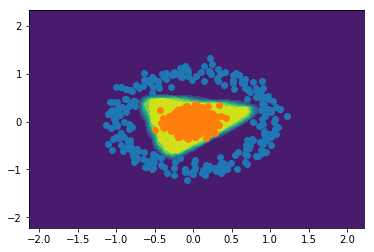

In [23]:
plot_decision_boundry(X, y)
scatter_plot()

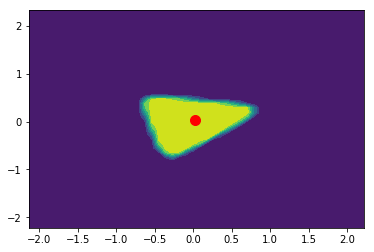

In [25]:
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker = 'o', markersize = 10, color = 'red')
plot_decision_boundry(X, y)